## Importación de Librerías

Comenzaremos importando las librerías necesarias para nuestro análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

## Carga de Datos

Cargamos los datos desde el archivo CSV en un DataFrame de pandas.

In [2]:
df = pd.read_csv("dataset/movies_and_tvshows.csv")

# Preprocesamiento de Datos

En esta sección, realizaremos las siguientes tareas de preprocesamiento en nuestro conjunto de datos:

1. Convertir la columna `metascore` a una escala de 1 a 10 para hacerla comparable con `user_score`.
2. Convertir la columna `release_date` a datetime.
3. Procesar los géneros y convertirlos en columnas individuales.
4. Convertir la duración de películas y series a minutos y número de temporadas respectivamente.


In [3]:
# Función optimizada para convertir duración
def min_converter_optimized(duration):
    """
    Convierte la duración en formato 'X h Y min' a minutos.
    Args:
    - duration (str): Duración en formato 'X h Y min' o similar.
    Returns:
    - int: Duración en minutos.
    """
    if duration:
        hours = int(re.search(r'(\d+)\s*h', duration).group(1)) * 60 if 'h' in duration else 0
        minutes = int(re.search(r'(\d+)\s*min', duration).group(1)) if 'min' in duration else 0
        return hours + minutes
    return None

# Convertir metascore a un número del 1 al 10
df["metascore"] = df["metascore"].apply(lambda x: round(int(x)/10, 1) if pd.notnull(x) else None)

# Convertir fechas a datetime
df["release_date"] = pd.to_datetime(df["release_date"])

# Procesamiento de géneros
df['genres'] = df['genres'].apply(eval)  # Convierte string a lista
generos_unicos = set.union(*df['genres'].apply(set))
generos_unicos = list(generos_unicos)
for genre in generos_unicos:
    df[genre] = df["genres"].apply(lambda x: 1 if genre in x else 0)
df.drop('genres', axis=1, inplace=True)

# Conversión de duración
df.loc[df['type'] == 'movie', 'duration'] = df.loc[df['type'] == 'movie', 'duration'].apply(min_converter_optimized)
df.loc[df['type'] == 'tvshow', 'duration'] = df.loc[df['type'] == 'tvshow', 'duration'].apply(lambda x: int(x.split()[0]))

# Almacenar la lista de géneros para películas y series en variables separadas
genres_movies = df[df['type'] == 'movie'][list(generos_unicos)].sum()
genres_series = df[df['type'] == 'tvshow'][list(generos_unicos)].sum()

genres_movies = genres_movies[genres_movies > 0].index.tolist()  # Lista de géneros de películas
genres_series = genres_series[genres_series > 0].index.tolist()  # Lista de géneros de series

## Distribución de Géneros

Calcularemos la distribución de cada género en nuestro conjunto de datos.


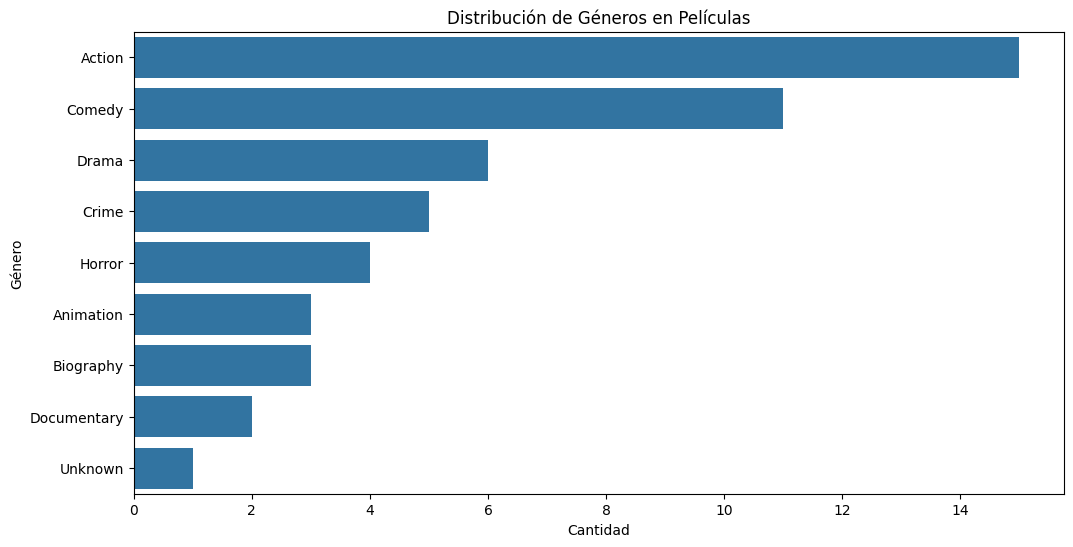

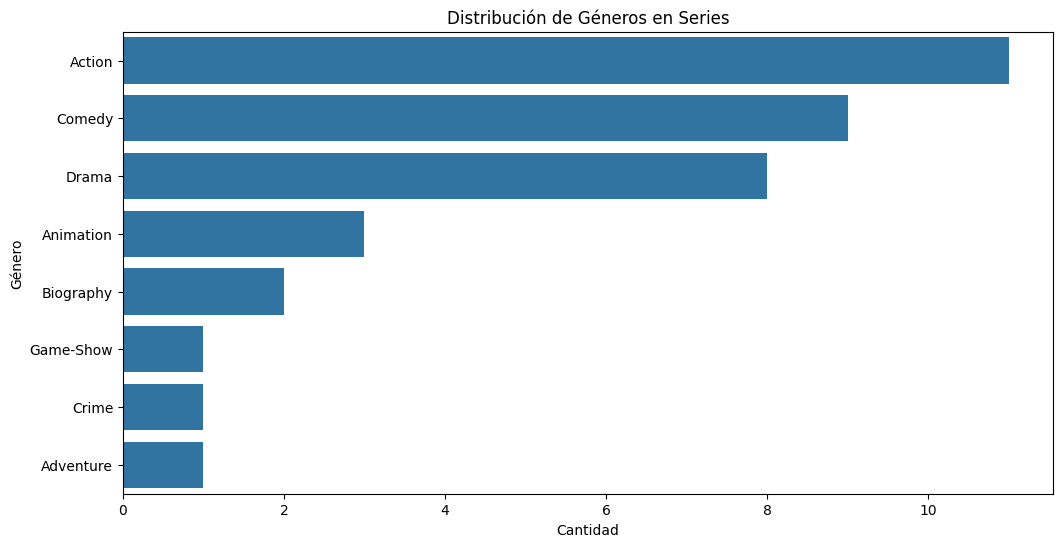

In [4]:
df.to_csv("dataset/movies_and_tvshows_clean.csv", index=False)
# Distribución de géneros para películas y series
movies = df[df['type'] == 'movie']
series = df[df['type'] == 'tvshow']

genre_distribution_movies = movies[genres_movies].sum().sort_values(ascending=False)
genre_distribution_series = series[genres_series].sum().sort_values(ascending=False)

# Visualización de la distribución de géneros para películas
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution_movies.values, y=genre_distribution_movies.index)
plt.title('Distribución de Géneros en Películas')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.show()

# Visualización de la distribución de géneros para series
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_distribution_series.values, y=genre_distribution_series.index)
plt.title('Distribución de Géneros en Series')
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.show()



## Relación entre Géneros y Calificaciones

Analizaremos la relación entre los géneros y las calificaciones (tanto de usuarios como de críticos).


In [5]:
average_scores_by_genre_movies = movies[genres_movies].multiply(movies['user_score','metascore'], axis="index").mean()
average_scores_by_genre_series = series[genres_series].multiply(series['user_score','metascore'], axis="index").mean()

plt.figure(figsize=(12, 6))
average_scores_by_genre_movies.plot(kind='bar')
plt.title('Calificación Promedio de Usuario por Género en Películas')
plt.xlabel('Género')
plt.ylabel('Calificación Promedio de Usuario')
plt.show()

plt.figure(figsize=(12, 6))
average_scores_by_genre_series.plot(kind='bar')
plt.title('Calificación Promedio de Usuario por Género en Series')
plt.xlabel('Género')
plt.ylabel('Calificación Promedio de Usuario')
plt.show()



KeyError: ('user_score', 'metascore')

## Análisis Temporal

Realizaremos un análisis de cómo han cambiado las preferencias de género y las calificaciones a lo largo del tiempo.


In [ ]:
# Análisis temporal por día del año
# Asegurarse de que 'release_date' es una columna y no el índice
df['release_date'] = pd.to_datetime(df['release_date'])

# Ahora agrupamos por el día del año
daily_data_movies = movies.groupby(df['release_date'].dt.dayofyear)[['metascore', 'user_score']].mean()
daily_data_series = series.groupby(df['release_date'].dt.dayofyear)[['metascore', 'user_score']].mean()


daily_data_movies.plot(figsize=(15, 7),kind='line', title='Calificaciones Diarias Promedio en Películas')
plt.xlabel('Día del Año')
plt.ylabel('Calificación Promedio')
plt.show()

daily_data_series.plot(figsize=(15, 7),kind='line', title='Calificaciones Diarias Promedio en Series')
plt.xlabel('Día del Año')
plt.ylabel('Calificación Promedio')
plt.show()

